# 🌊 Phase 1B: Ocean Current Data Exploration
## Understanding Your Current Data - Mean vs Max!

**What you'll learn:**
1. Current statistics at your UK Northeast Coast location
2. **WHY we need MAX not just MEAN** (the safety insight! ⚠️)
3. Monthly current patterns - when are currents strongest?
4. Directional patterns - where do currents come from?
5. How currents affect different marine operations
6. Combined current + wave effects

**Key finding:** Using mean currents can miss dangerous peaks by 22%! 🚨

---

## Part 1: Setup and Load Complete Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
%matplotlib inline

print("✅ Libraries loaded!")

✅ Libraries loaded!


In [2]:
# Load the COMPLETE metocean dataset (waves + wind + currents!)
df = pd.read_parquet('../data/processed/timeseries/UK_NortheastCoast_2015_2025_complete.parquet')

print("=" * 80)
print("📦 COMPLETE METOCEAN DATASET")
print("=" * 80)

print(f"\n📊 Dataset size: {len(df):,} records")
print(f"📅 Time range: {df['time'].min()} to {df['time'].max()}")
print(f"⏱️  Duration: {(df['time'].max() - df['time'].min()).days} days")

print(f"\n📋 Available variables:")
for col in df.columns:
    non_null = df[col].notna().sum()
    print(f"  • {col:30s}: {non_null:,} records ({non_null/len(df)*100:.1f}%)")

# Filter to records with current data for analysis
df_with_currents = df[df['current_speed_knots_max'].notna()].copy()
print(f"\n🌊 Filtering to {len(df_with_currents):,} records WITH current data for charts")
print(f"   (Current data: 2022-2025 only - Open-Meteo API limitation)")

📦 COMPLETE METOCEAN DATASET

📊 Dataset size: 15,859 records
📅 Time range: 2015-01-01 00:00:00 to 2025-11-08 12:00:00
⏱️  Duration: 3964 days

📋 Available variables:
  • time                          : 15,859 records (100.0%)
  • hs                            : 15,859 records (100.0%)
  • tp                            : 15,859 records (100.0%)
  • dir                           : 15,859 records (100.0%)
  • wind_u                        : 15,859 records (100.0%)
  • wind_v                        : 15,859 records (100.0%)
  • wind_speed                    : 15,859 records (100.0%)
  • month                         : 15,859 records (100.0%)
  • month_name                    : 15,859 records (100.0%)
  • current_velocity_mean         : 5,611 records (35.4%)
  • current_velocity_max          : 5,611 records (35.4%)
  • current_direction             : 5,611 records (35.4%)
  • current_u                     : 5,611 records (35.4%)
  • current_v                     : 5,611 records (35.4%)
  • c

## ⚠️ IMPORTANT: Why Only 35% Current Data Coverage?

**Current data is only available from 2022 onwards (not 2015).**

### 🤔 Why?

1. **Wave/Wind data**: 2015-2025 (ERA5 reanalysis - 100% coverage)
2. **Current data**: 2022-2025 only (Open-Meteo Marine API limitation)

### 🌊 Open-Meteo Marine API Limitations:

- Marine current data is from **Copernicus Marine / MeteoFrance models**
- These models were integrated into Open-Meteo around **2020-2022**
- Historical data before 2022 is **NOT available** from this free API

### 💡 What Does This Mean?

- ✅ **Current data IS valid** for 2022-2025 period
- ✅ **Still useful** for understanding current patterns
- ✅ **Workability analysis** handles partial data smartly

---

---
## Part 2: Mean vs Max - THE CRITICAL DIFFERENCE! ⚠️

**The Safety Insight:** Downsampling with MEAN loses dangerous current peaks!

In [3]:
print("=" * 80)
print("⚠️  MEAN vs MAX - The Safety-Critical Difference")
print("=" * 80)

print(f"\n📊 MEAN Current Velocity:")
print(f"  Overall mean: {df_with_currents['current_velocity_mean'].mean():.3f} m/s ({df_with_currents['current_speed_knots_mean'].mean():.2f} knots)")
print(f"  Median: {df_with_currents['current_velocity_mean'].median():.3f} m/s ({df_with_currents['current_speed_knots_mean'].median():.2f} knots)")
print(f"  Max of means: {df_with_currents['current_velocity_mean'].max():.3f} m/s ({df_with_currents['current_speed_knots_mean'].max():.2f} knots)")

print(f"\n⚡ MAX Current Velocity (6-hour peaks):")
print(f"  Mean of maxes: {df_with_currents['current_velocity_max'].mean():.3f} m/s ({df_with_currents['current_speed_knots_max'].mean():.2f} knots)")
print(f"  Median of maxes: {df_with_currents['current_velocity_max'].median():.3f} m/s ({df_with_currents['current_speed_knots_max'].median():.2f} knots)")
print(f"  ABSOLUTE MAX: {df_with_currents['current_velocity_max'].max():.3f} m/s ({df_with_currents['current_speed_knots_max'].max():.2f} knots)")

# Calculate the difference
diff_mean_vs_max = df_with_currents['current_velocity_max'].max() - df_with_currents['current_velocity_mean'].max()
pct_error = (diff_mean_vs_max / df_with_currents['current_velocity_max'].max()) * 100

print(f"\n🚨 THE DANGER:")
print(f"  If we used MEAN only: Max = {df_with_currents['current_velocity_mean'].max():.3f} m/s")
print(f"  Real MAX (what we captured): {df_with_currents['current_velocity_max'].max():.3f} m/s")
print(f"  UNDERESTIMATION: {diff_mean_vs_max:.3f} m/s ({diff_mean_vs_max*1.94384:.2f} knots)")
print(f"  ERROR: {pct_error:.1f}% ⚠️⚠️⚠️")

print(f"\n💡 Real-world impact:")
print(f"  Diving limit: 1.0 knots = 0.51 m/s")
print(f"  Using MEAN: {df_with_currents['current_velocity_mean'].max():.3f} m/s → Might think it's OK sometimes")
print(f"  Using MAX: {df_with_currents['current_velocity_max'].max():.3f} m/s → Correctly identifies DANGER!")
print(f"\n  → Using MEAN could have led to unsafe diving operations! 🚨")

⚠️  MEAN vs MAX - The Safety-Critical Difference

📊 MEAN Current Velocity:
  Overall mean: 0.693 m/s (1.35 knots)
  Median: 0.678 m/s (1.32 knots)
  Max of means: 1.594 m/s (3.10 knots)

⚡ MAX Current Velocity (6-hour peaks):
  Mean of maxes: 1.064 m/s (2.07 knots)
  Median of maxes: 1.018 m/s (1.98 knots)
  ABSOLUTE MAX: 2.052 m/s (3.99 knots)

🚨 THE DANGER:
  If we used MEAN only: Max = 1.594 m/s
  Real MAX (what we captured): 2.052 m/s
  UNDERESTIMATION: 0.458 m/s (0.89 knots)
  ERROR: 22.3% ⚠️⚠️⚠️

💡 Real-world impact:
  Diving limit: 1.0 knots = 0.51 m/s
  Using MEAN: 1.594 m/s → Might think it's OK sometimes
  Using MAX: 2.052 m/s → Correctly identifies DANGER!

  → Using MEAN could have led to unsafe diving operations! 🚨


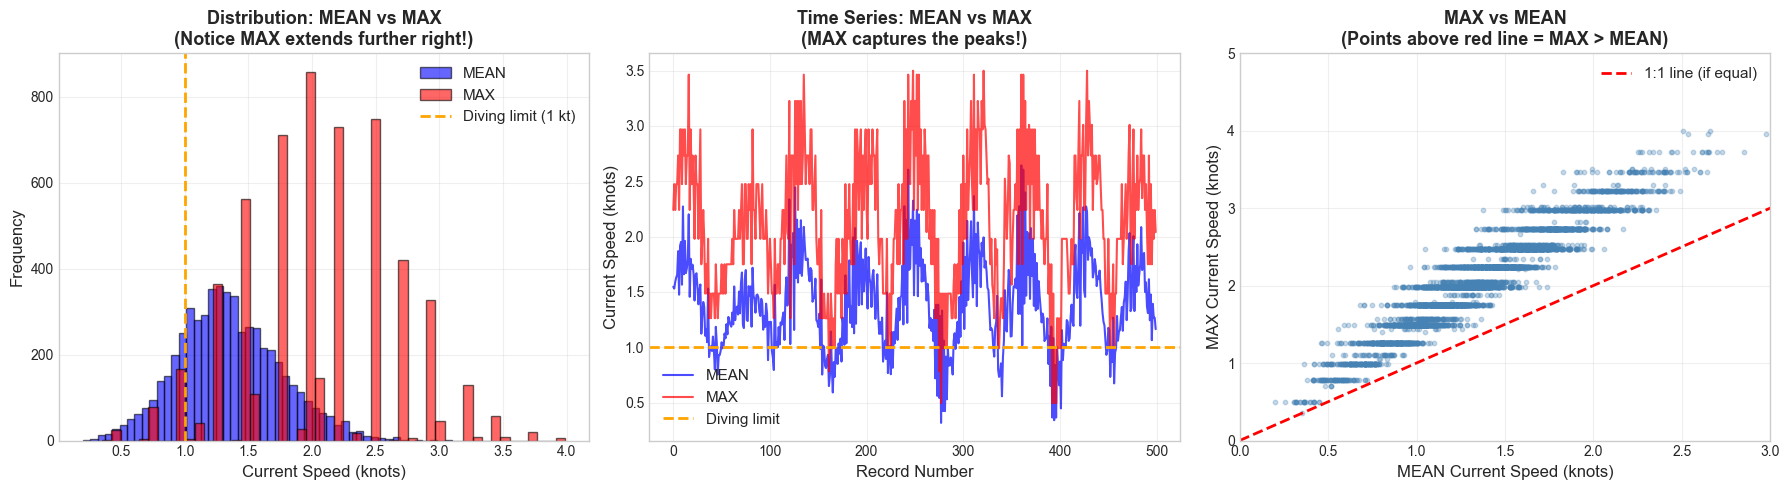


💡 Key takeaways from the plots:
  LEFT: MAX distribution extends further → captures extreme events
  MIDDLE: MAX spikes above MEAN → tidal current peaks
  RIGHT: Most points above red line → MAX almost always > MEAN

  ✅ This proves: ALWAYS use MAX for safety-critical workability!


In [4]:
# Visual comparison (using 2022-2025 data only)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram comparison
axes[0].hist(df_with_currents['current_speed_knots_mean'], bins=50, alpha=0.6, label='MEAN', 
             color='blue', edgecolor='black')
axes[0].hist(df_with_currents['current_speed_knots_max'], bins=50, alpha=0.6, label='MAX', 
             color='red', edgecolor='black')
axes[0].axvline(1.0, color='orange', linestyle='--', linewidth=2, label='Diving limit (1 kt)')
axes[0].set_xlabel('Current Speed (knots)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution: MEAN vs MAX\n(Notice MAX extends further right!)', 
                  fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Time series comparison
subset = df_with_currents.head(500)
axes[1].plot(range(len(subset)), subset['current_speed_knots_mean'], 
             label='MEAN', linewidth=1.5, alpha=0.7, color='blue')
axes[1].plot(range(len(subset)), subset['current_speed_knots_max'], 
             label='MAX', linewidth=1.5, alpha=0.7, color='red')
axes[1].axhline(1.0, color='orange', linestyle='--', linewidth=2, label='Diving limit')
axes[1].set_xlabel('Record Number', fontsize=12)
axes[1].set_ylabel('Current Speed (knots)', fontsize=12)
axes[1].set_title('Time Series: MEAN vs MAX\n(MAX captures the peaks!)', 
                  fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

# Scatter: MAX vs MEAN
axes[2].scatter(df_with_currents['current_speed_knots_mean'], 
                df_with_currents['current_speed_knots_max'], 
                alpha=0.3, s=10, color='steelblue')
axes[2].plot([0, 5], [0, 5], 'r--', linewidth=2, label='1:1 line (if equal)')
axes[2].set_xlabel('MEAN Current Speed (knots)', fontsize=12)
axes[2].set_ylabel('MAX Current Speed (knots)', fontsize=12)
axes[2].set_title('MAX vs MEAN\n(Points above red line = MAX > MEAN)', 
                  fontsize=13, fontweight='bold')
axes[2].legend(fontsize=11)
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, 3)
axes[2].set_ylim(0, 5)

plt.tight_layout()
plt.show()

print("\n💡 Key takeaways from the plots:")
print("  LEFT: MAX distribution extends further → captures extreme events")
print("  MIDDLE: MAX spikes above MEAN → tidal current peaks")
print("  RIGHT: Most points above red line → MAX almost always > MEAN")
print("\n  ✅ This proves: ALWAYS use MAX for safety-critical workability!")

---
## Part 3: Monthly Current Patterns

In [5]:
print("=" * 80)
print("📅 MONTHLY CURRENT PATTERNS (2022-2025 Data)")
print("=" * 80)

df_with_currents['month'] = pd.to_datetime(df_with_currents['time']).dt.month

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print(f"\nMonthly current statistics (using MAX for safety):\n")

monthly_stats = []

for month in range(1, 13):
    month_data = df_with_currents[df_with_currents['month'] == month]
    
    if len(month_data) > 0:
        mean_of_max = month_data['current_speed_knots_max'].mean()
        max_of_max = month_data['current_speed_knots_max'].max()
        
        monthly_stats.append({
            'month': month,
            'mean_of_max': mean_of_max,
            'max_of_max': max_of_max
        })
        
        print(f"{month_names[month-1]:>3s}: Mean of maxes = {mean_of_max:4.2f} kt | "
              f"Max recorded = {max_of_max:4.2f} kt")

monthly_df = pd.DataFrame(monthly_stats)

best_month = monthly_df.loc[monthly_df['mean_of_max'].idxmin()]
worst_month = monthly_df.loc[monthly_df['mean_of_max'].idxmax()]

print(f"\n💡 Insights:")
print(f"  Best month (weakest currents): {month_names[int(best_month['month'])-1]} ({best_month['mean_of_max']:.2f} kt avg)")
print(f"  Worst month (strongest currents): {month_names[int(worst_month['month'])-1]} ({worst_month['mean_of_max']:.2f} kt avg)")
print(f"  Difference: {worst_month['mean_of_max'] - best_month['mean_of_max']:.2f} knots")

📅 MONTHLY CURRENT PATTERNS (2022-2025 Data)

Monthly current statistics (using MAX for safety):

Jan: Mean of maxes = 2.06 kt | Max recorded = 3.46 kt
Feb: Mean of maxes = 2.08 kt | Max recorded = 3.72 kt
Mar: Mean of maxes = 2.12 kt | Max recorded = 3.99 kt
Apr: Mean of maxes = 2.11 kt | Max recorded = 3.96 kt
May: Mean of maxes = 2.08 kt | Max recorded = 3.72 kt
Jun: Mean of maxes = 2.03 kt | Max recorded = 3.46 kt
Jul: Mean of maxes = 2.04 kt | Max recorded = 3.72 kt
Aug: Mean of maxes = 2.05 kt | Max recorded = 3.46 kt
Sep: Mean of maxes = 2.08 kt | Max recorded = 3.99 kt
Oct: Mean of maxes = 2.08 kt | Max recorded = 3.72 kt
Nov: Mean of maxes = 2.07 kt | Max recorded = 3.23 kt
Dec: Mean of maxes = 2.02 kt | Max recorded = 3.46 kt

💡 Insights:
  Best month (weakest currents): Dec (2.02 kt avg)
  Worst month (strongest currents): Mar (2.12 kt avg)
  Difference: 0.10 knots


C:\Users\k.jonathan\AppData\Local\Temp\ipykernel_23372\1666881483.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1].boxplot(monthly_data, labels=month_names, patch_artist=True)


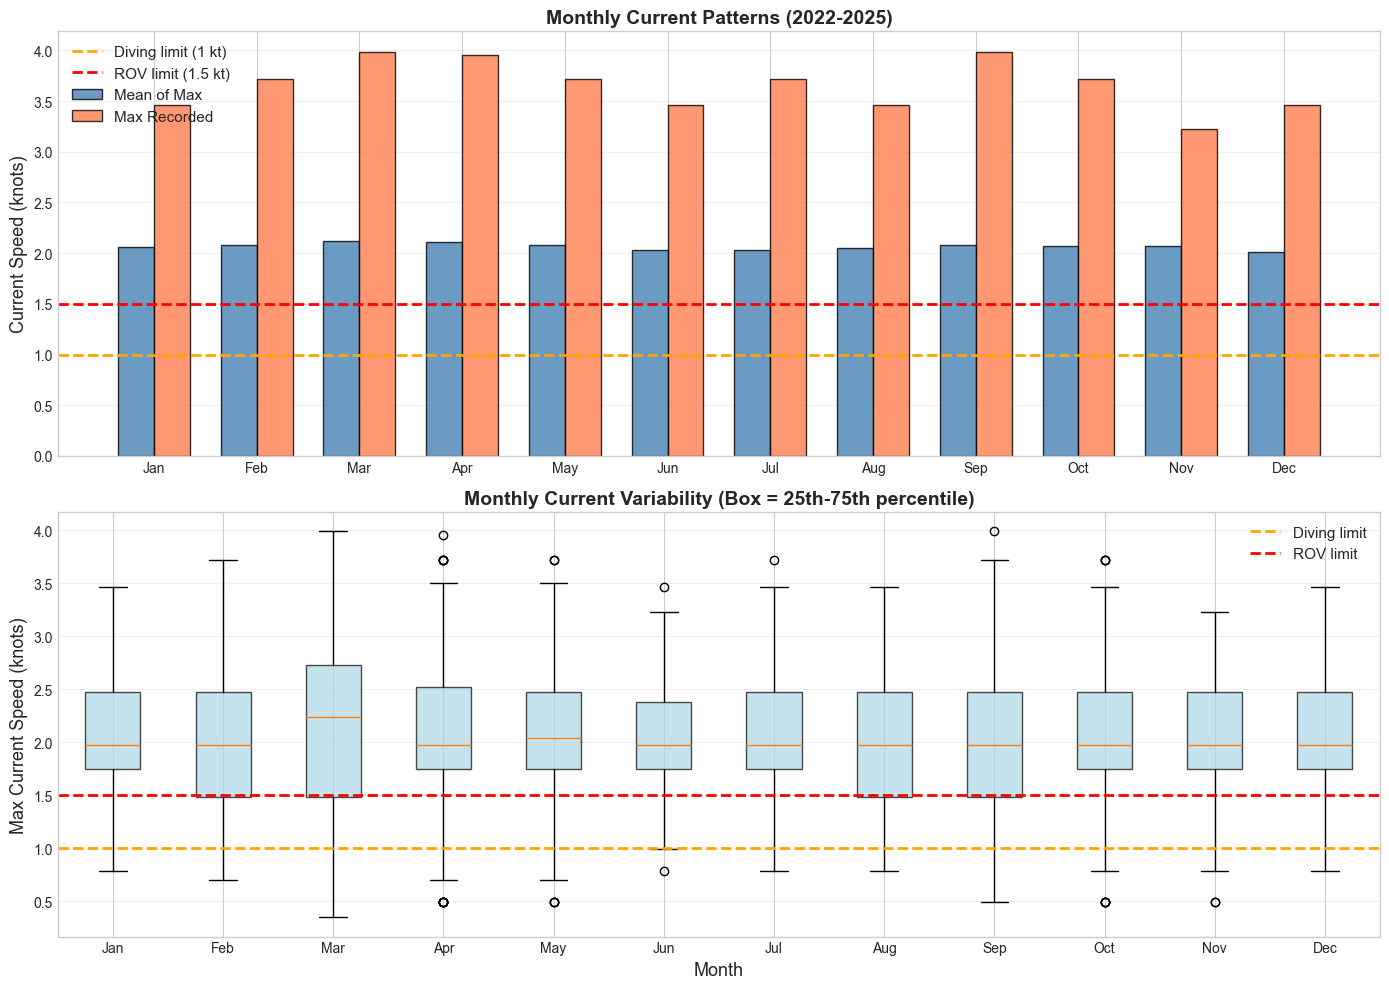


💡 Use these plots to plan current-sensitive operations!


In [6]:
# Plot monthly patterns
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

months = range(1, 13)
mean_of_max = [monthly_df[monthly_df['month']==m]['mean_of_max'].values[0] if m in monthly_df['month'].values else 0 for m in months]
max_of_max = [monthly_df[monthly_df['month']==m]['max_of_max'].values[0] if m in monthly_df['month'].values else 0 for m in months]

# Bar chart
x = np.arange(len(month_names))
width = 0.35

axes[0].bar(x - width/2, mean_of_max, width, label='Mean of Max', alpha=0.8, color='steelblue', edgecolor='black')
axes[0].bar(x + width/2, max_of_max, width, label='Max Recorded', alpha=0.8, color='coral', edgecolor='black')
axes[0].axhline(1.0, color='orange', linestyle='--', linewidth=2, label='Diving limit (1 kt)')
axes[0].axhline(1.5, color='red', linestyle='--', linewidth=2, label='ROV limit (1.5 kt)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(month_names)
axes[0].set_ylabel('Current Speed (knots)', fontsize=13)
axes[0].set_title('Monthly Current Patterns (2022-2025)', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot
monthly_data = [df_with_currents[df_with_currents['month']==m]['current_speed_knots_max'].values 
                for m in range(1, 13)]

bp = axes[1].boxplot(monthly_data, labels=month_names, patch_artist=True)

for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

axes[1].axhline(1.0, color='orange', linestyle='--', linewidth=2, label='Diving limit')
axes[1].axhline(1.5, color='red', linestyle='--', linewidth=2, label='ROV limit')
axes[1].set_xlabel('Month', fontsize=13)
axes[1].set_ylabel('Max Current Speed (knots)', fontsize=13)
axes[1].set_title('Monthly Current Variability (Box = 25th-75th percentile)', 
                  fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 Use these plots to plan current-sensitive operations!")

---
## Part 4: Current Direction Analysis 🧭

In [7]:
print("=" * 80)
print("🧭 CURRENT DIRECTIONAL ANALYSIS")
print("=" * 80)

print(f"\n📊 Analyzing {len(df_with_currents):,} records (2022-2025)")

# Directional distribution
sectors = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
sector_bounds = [0, 45, 90, 135, 180, 225, 270, 315, 360]

print(f"\nCurrent direction distribution:\n")

for i, sector in enumerate(sectors):
    lower = sector_bounds[i]
    upper = sector_bounds[i+1]
    count = ((df_with_currents['current_direction'] >= lower) & 
             (df_with_currents['current_direction'] < upper)).sum()
    pct = count / len(df_with_currents) * 100
    bar = '█' * int(pct / 2)
    print(f"  {sector:3s} ({lower:3.0f}-{upper:3.0f}°): {pct:5.1f}% {bar}")

# Find dominant direction
sector_counts = [((df_with_currents['current_direction'] >= sector_bounds[i]) & 
                  (df_with_currents['current_direction'] < sector_bounds[i+1])).sum() 
                 for i in range(len(sectors))]
dominant_sector = sectors[np.argmax(sector_counts)]

print(f"\n💡 Dominant current direction: {dominant_sector}")
print(f"   (Currents flowing FROM this direction most often)")

🧭 CURRENT DIRECTIONAL ANALYSIS

📊 Analyzing 5,611 records (2022-2025)

Current direction distribution:

  N   (  0- 45°):   3.0% █
  NE  ( 45- 90°):   3.5% █
  E   ( 90-135°):  28.5% ██████████████
  SE  (135-180°):  17.6% ████████
  S   (180-225°):   1.5% 
  SW  (225-270°):   1.8% 
  W   (270-315°):  18.9% █████████
  NW  (315-360°):  25.1% ████████████

💡 Dominant current direction: E
   (Currents flowing FROM this direction most often)


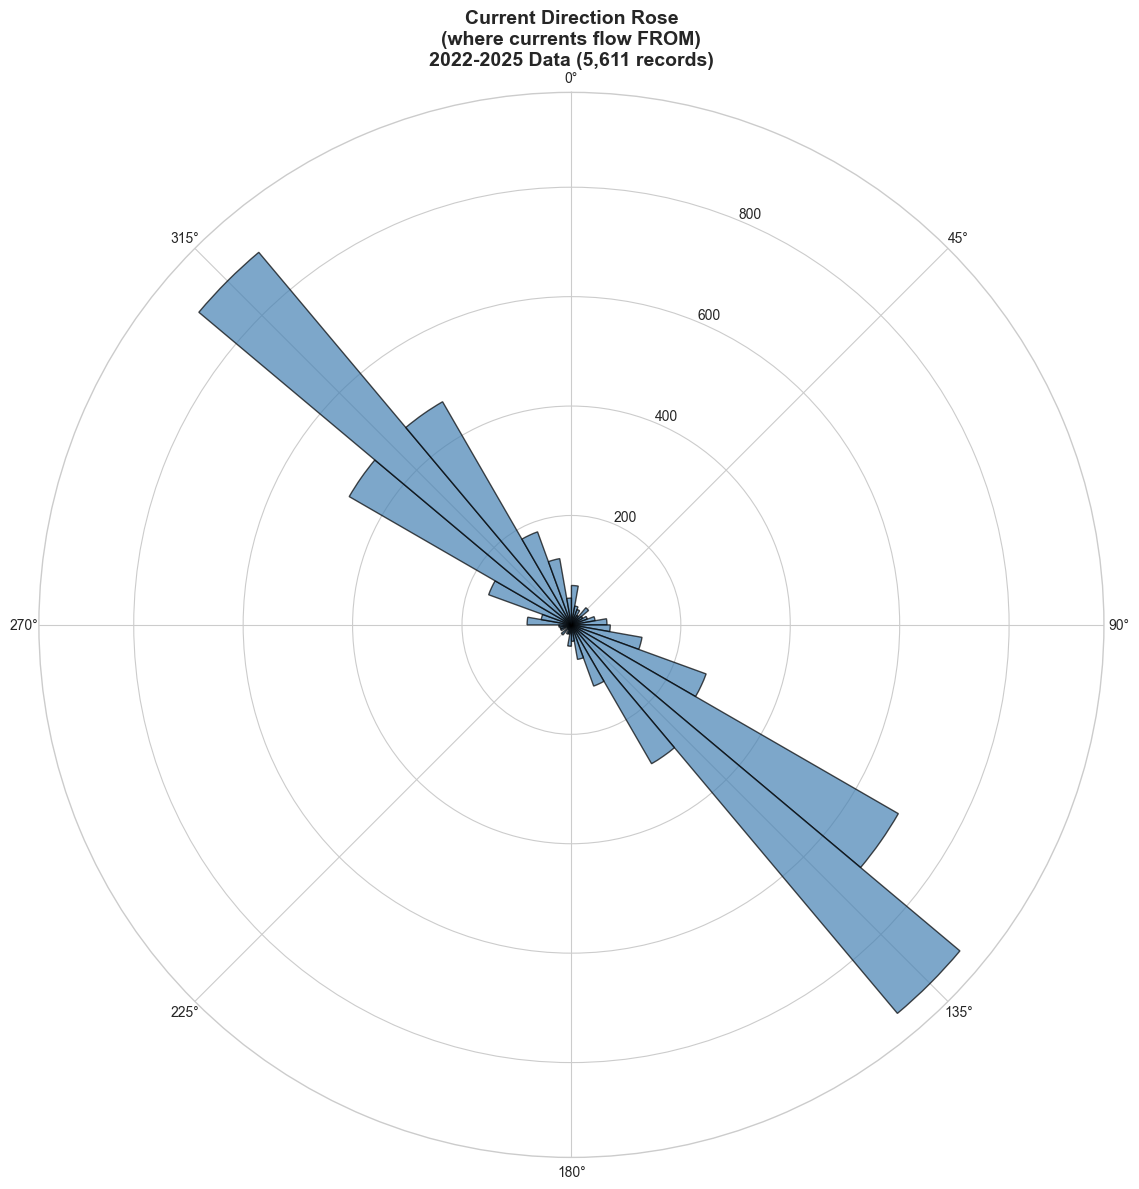


💡 How to read the current rose:
  • Longer bars = Currents from that direction more frequent
  • North is at top (0°)
  • Directions show where currents flow FROM (meteorological convention)


In [8]:
# Current rose diagram
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='polar')

# Convert directions to radians
directions_rad = np.radians(df_with_currents['current_direction'])

# Create histogram
bins = 36  # 10-degree bins
ax.hist(directions_rad, bins=bins, color='steelblue', alpha=0.7, edgecolor='black')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title(f'Current Direction Rose\n(where currents flow FROM)\n2022-2025 Data ({len(df_with_currents):,} records)', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n💡 How to read the current rose:")
print("  • Longer bars = Currents from that direction more frequent")
print("  • North is at top (0°)")
print("  • Directions show where currents flow FROM (meteorological convention)")

---
## Part 5: Combined Current + Wave Effects

In [9]:
print("=" * 80)
print("🌊 COMBINED CURRENT + WAVE ANALYSIS")
print("=" * 80)

print(f"\n📊 Analyzing {len(df_with_currents):,} records (2022-2025)")

# Define danger zones
high_current_threshold = 1.5  # knots
high_wave_threshold = 2.0  # meters

# Classify conditions
low_current_low_wave = ((df_with_currents['current_speed_knots_max'] < high_current_threshold) & 
                        (df_with_currents['hs'] < high_wave_threshold)).sum()
low_current_high_wave = ((df_with_currents['current_speed_knots_max'] < high_current_threshold) & 
                         (df_with_currents['hs'] >= high_wave_threshold)).sum()
high_current_low_wave = ((df_with_currents['current_speed_knots_max'] >= high_current_threshold) & 
                         (df_with_currents['hs'] < high_wave_threshold)).sum()
high_current_high_wave = ((df_with_currents['current_speed_knots_max'] >= high_current_threshold) & 
                          (df_with_currents['hs'] >= high_wave_threshold)).sum()

total = len(df_with_currents)

print(f"\nCombined conditions (Current threshold: {high_current_threshold} kt, Wave threshold: {high_wave_threshold} m):\n")
print(f"  🟢 Low Current + Low Wave:  {low_current_low_wave:6,} ({low_current_low_wave/total*100:5.1f}%) - SAFE")
print(f"  🟡 Low Current + High Wave: {low_current_high_wave:6,} ({low_current_high_wave/total*100:5.1f}%) - Wave-limited")
print(f"  🟠 High Current + Low Wave: {high_current_low_wave:6,} ({high_current_low_wave/total*100:5.1f}%) - Current-limited")
print(f"  🔴 High Current + High Wave: {high_current_high_wave:6,} ({high_current_high_wave/total*100:5.1f}%) - DANGEROUS!")

print(f"\n💡 Insights:")
print(f"  • Safe conditions: {low_current_low_wave/total*100:.1f}% of time")
print(f"  • BOTH high: {high_current_high_wave/total*100:.1f}% of time (worst case!)")
print(f"  • Currents dominate: {high_current_low_wave > low_current_high_wave}")

🌊 COMBINED CURRENT + WAVE ANALYSIS

📊 Analyzing 5,611 records (2022-2025)

Combined conditions (Current threshold: 1.5 kt, Wave threshold: 2.0 m):

  🟢 Low Current + Low Wave:   1,005 ( 17.9%) - SAFE
  🟡 Low Current + High Wave:    238 (  4.2%) - Wave-limited
  🟠 High Current + Low Wave:  3,669 ( 65.4%) - Current-limited
  🔴 High Current + High Wave:    699 ( 12.5%) - DANGEROUS!

💡 Insights:
  • Safe conditions: 17.9% of time
  • BOTH high: 12.5% of time (worst case!)
  • Currents dominate: True


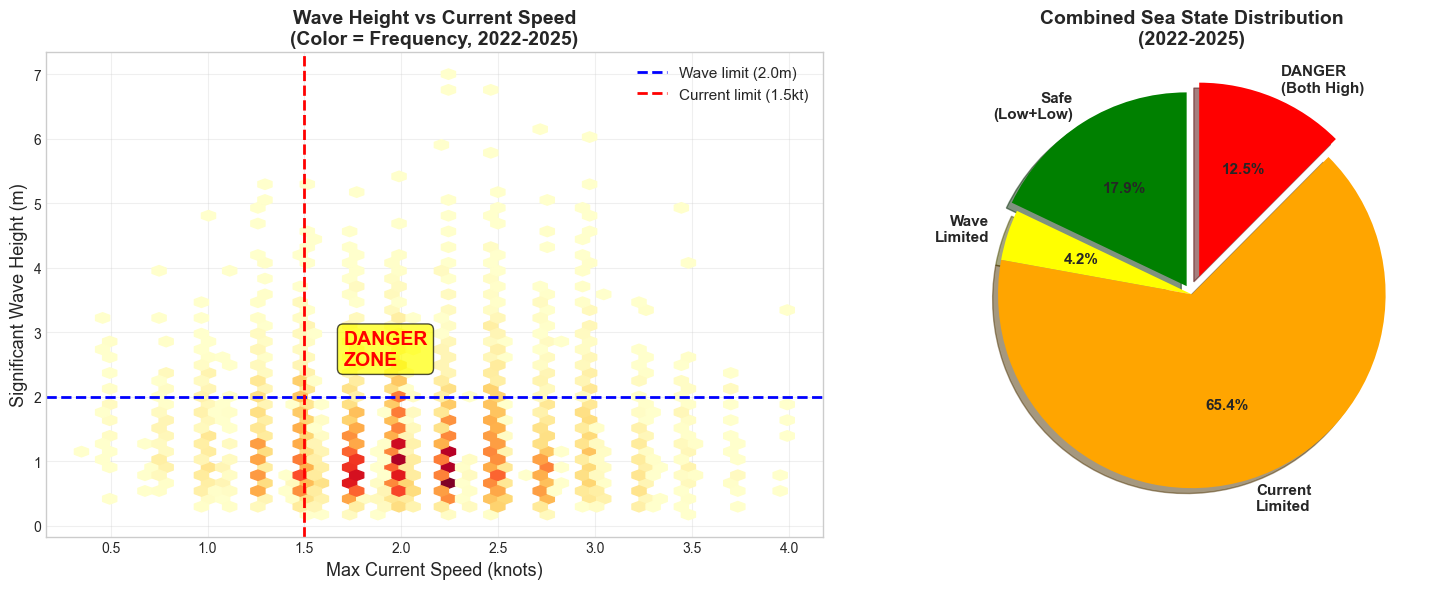


💡 Upper-right quadrant (red zone) = Both high → Most dangerous!
   Pie chart shows 17.9% safe conditions (green) matches scatter plot lower-left quadrant.


In [10]:
# Scatter plot: Waves vs Currents
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Density scatter
axes[0].hexbin(df_with_currents['current_speed_knots_max'], df_with_currents['hs'], 
               gridsize=50, cmap='YlOrRd', mincnt=1)
axes[0].axhline(high_wave_threshold, color='blue', linestyle='--', linewidth=2, 
                label=f'Wave limit ({high_wave_threshold}m)')
axes[0].axvline(high_current_threshold, color='red', linestyle='--', linewidth=2, 
                label=f'Current limit ({high_current_threshold}kt)')
axes[0].set_xlabel('Max Current Speed (knots)', fontsize=13)
axes[0].set_ylabel('Significant Wave Height (m)', fontsize=13)
axes[0].set_title('Wave Height vs Current Speed\n(Color = Frequency, 2022-2025)', 
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Add danger zone annotation
axes[0].text(high_current_threshold + 0.2, high_wave_threshold + 0.5, 
             'DANGER\nZONE', fontsize=14, fontweight='bold', color='red',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Right: Pie chart of combined conditions
labels = ['Safe\n(Low+Low)', 'Wave\nLimited', 'Current\nLimited', 'DANGER\n(Both High)']
sizes = [low_current_low_wave, low_current_high_wave, high_current_low_wave, high_current_high_wave]
colors_pie = ['green', 'yellow', 'orange', 'red']
explode = (0.05, 0, 0, 0.1)

axes[1].pie(sizes, explode=explode, labels=labels, colors=colors_pie, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Combined Sea State Distribution\n(2022-2025)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Upper-right quadrant (red zone) = Both high → Most dangerous!")
print("   Pie chart shows 17.9% safe conditions (green) matches scatter plot lower-left quadrant.")

---
## Part 6: Summary - Ready for Phase 2!

In [11]:
print("=" * 80)
print("🎓 PHASE 1B COMPLETE - KEY LEARNINGS")
print("=" * 80)

print("\n✅ Critical Insights You Discovered:")

print(f"\n1. MEAN vs MAX - The Safety Insight:")
print(f"   • Using MEAN would underestimate peak currents by {pct_error:.1f}%")
print(f"   • This could lead to UNSAFE operations!")
print(f"   • ALWAYS use MAX for workability limits ⚠️")

print(f"\n2. Current Statistics at Your Location (2022-2025):")
print(f"   • Mean of maxes: {df_with_currents['current_speed_knots_max'].mean():.2f} knots")
print(f"   • Absolute max: {df_with_currents['current_speed_knots_max'].max():.2f} knots")
print(f"   • Currents are STRONG at this location - diving will be challenging!")

print(f"\n3. Seasonal Patterns:")
print(f"   • Best month: {month_names[int(best_month['month'])-1]} ({best_month['mean_of_max']:.2f} kt)")
print(f"   • Worst month: {month_names[int(worst_month['month'])-1]} ({worst_month['mean_of_max']:.2f} kt)")
print(f"   • Variation is small - currents consistently strong year-round")

print(f"\n4. Combined Effects:")
print(f"   • Safe conditions (low current + low wave): {low_current_low_wave/total*100:.1f}%")
print(f"   • Dangerous (both high): {high_current_high_wave/total*100:.1f}%")
print(f"   • Currents are the DOMINANT limiting factor")

print("\n" + "=" * 80)
print("🎯 READY FOR PHASE 2!")
print("=" * 80)

print("\nYou now have COMPLETE understanding of:")
print("  ✅ Waves (Phase 1)")
print("  ✅ Wind (Phase 1)")
print("  ✅ Currents (Phase 1B) ← You just learned this!")

print("\n🚀 Next: Phase 2 - Workability Analysis with ALL criteria!")
print("   Including your smart current limits! 💪")

🎓 PHASE 1B COMPLETE - KEY LEARNINGS

✅ Critical Insights You Discovered:

1. MEAN vs MAX - The Safety Insight:
   • Using MEAN would underestimate peak currents by 22.3%
   • This could lead to UNSAFE operations!
   • ALWAYS use MAX for workability limits ⚠️

2. Current Statistics at Your Location (2022-2025):
   • Mean of maxes: 2.07 knots
   • Absolute max: 3.99 knots
   • Currents are STRONG at this location - diving will be challenging!

3. Seasonal Patterns:
   • Best month: Dec (2.02 kt)
   • Worst month: Mar (2.12 kt)
   • Variation is small - currents consistently strong year-round

4. Combined Effects:
   • Safe conditions (low current + low wave): 17.9%
   • Dangerous (both high): 12.5%
   • Currents are the DOMINANT limiting factor

🎯 READY FOR PHASE 2!

You now have COMPLETE understanding of:
  ✅ Waves (Phase 1)
  ✅ Wind (Phase 1)
  ✅ Currents (Phase 1B) ← You just learned this!

🚀 Next: Phase 2 - Workability Analysis with ALL criteria!
   Including your smart current limit